## Importing the dataset

In [1]:
import numpy as np
import pandas as pd
dataset_train = pd.read_csv("train.csv")
dataset_test = pd.read_csv("test.csv")

In [2]:
dataset_train.info()
dataset_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
dataset_test.info()
dataset_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## EDA

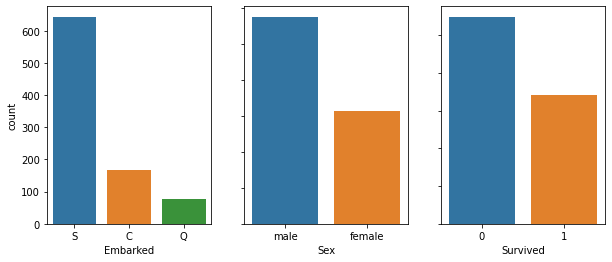

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
dataset_eda = dataset_train.copy()
ax = plt.figure(figsize=(10,4)).subplots(1,3)
sns.countplot(x='Embarked', data=dataset_eda, ax=ax[0])
sns.countplot(x='Sex', data=dataset_eda, ax=ax[1])
sns.countplot(x='Survived', data=dataset_eda, ax=ax[2])
for i in [0,1,2]:
    ax[i].label_outer()

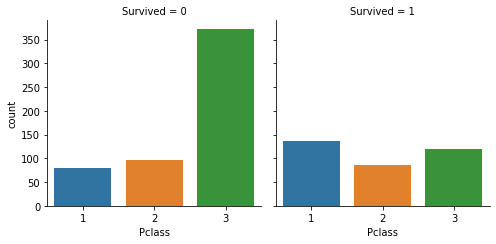

In [7]:
sns.catplot(x='Pclass', col='Survived', kind='count', data=dataset_eda, height=3.5)

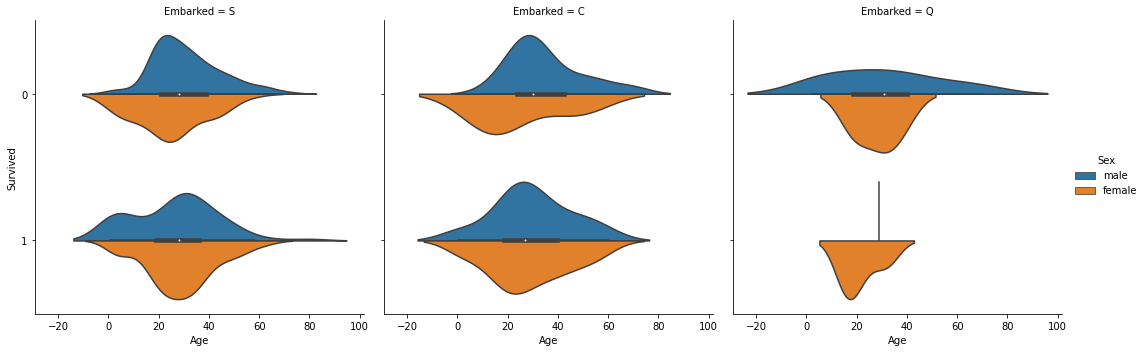

In [12]:
dataset_eda['Survived'] = dataset_eda['Survived'].astype(str)
sns.catplot(data = dataset_eda, x='Age', y='Survived', hue='Sex', col='Embarked', kind='violin', split=True) ## S: Southampton, C: Cherbourg, Q: Queenstwon

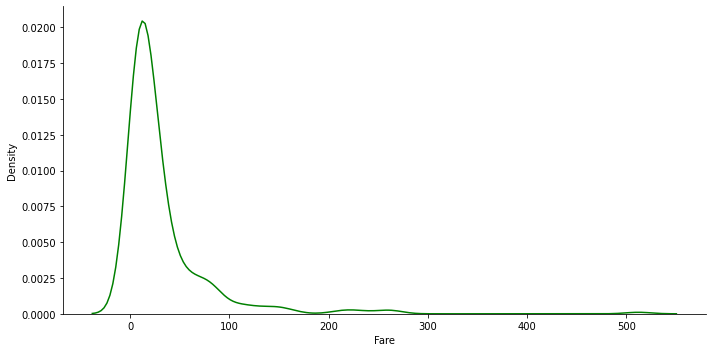

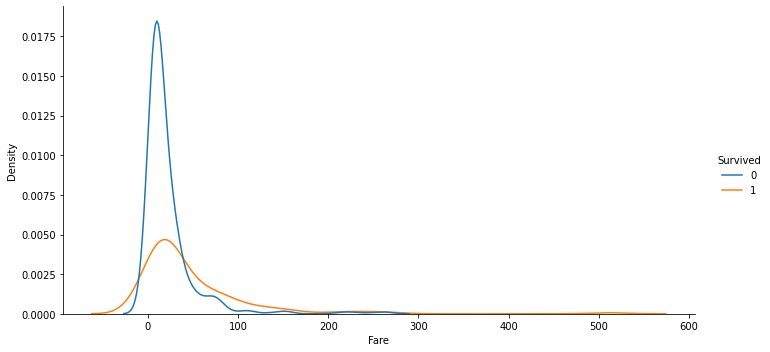

In [16]:
sns.displot(data=dataset_eda, x='Fare', kind='kde', height=5, aspect=2, color='g')
sns.displot(data = dataset_eda, x='Fare', hue='Survived', kind='kde', height=5, aspect=2)

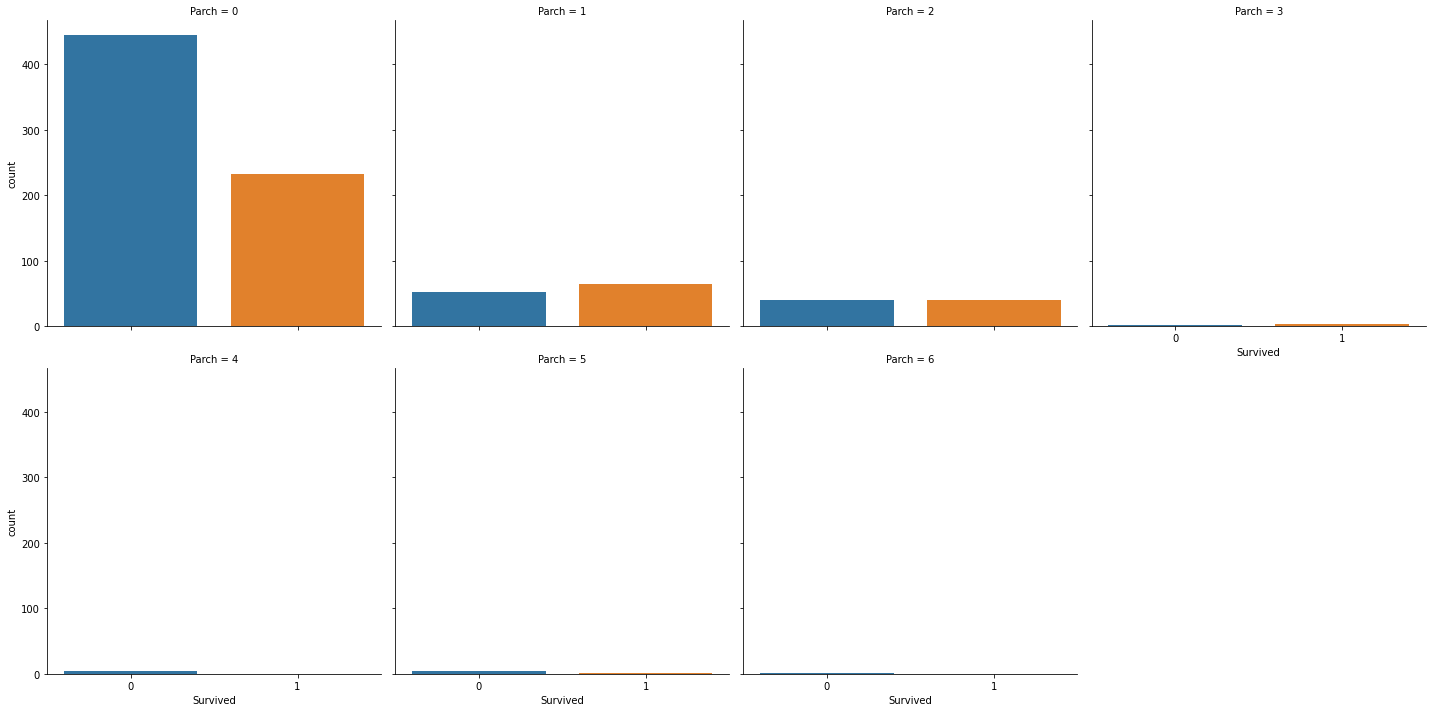

In [18]:
sns.catplot(data=dataset_eda, x='Survived', col='Parch', kind='count', col_wrap=4)

<AxesSubplot:xlabel='Pclass', ylabel='Parch'>

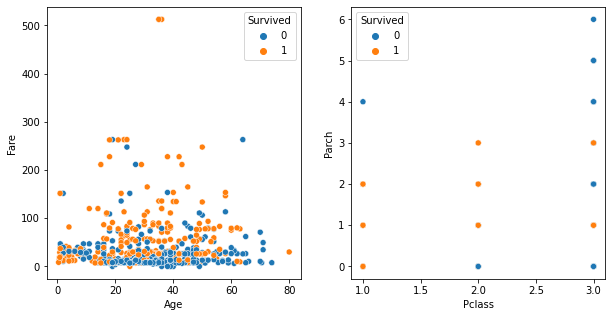

In [13]:
ax = plt.figure(figsize=(10,5)).subplots(1,2)
sns.scatterplot(data=dataset_eda, x='Age', y='Fare', hue='Survived', ax=ax[0])
sns.scatterplot(data=dataset_eda, x='Pclass', y='Parch', hue='Survived', ax=ax[1])

## Createing the training set and the test set

In [148]:
from sklearn.model_selection import train_test_split
X = dataset_train[['Pclass','Sex','Age','SibSp','Parch', 'Fare', 'Embarked']].copy()
y = dataset_train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_submission = dataset_test[['Pclass','Sex','Age','SibSp','Parch', 'Fare', 'Embarked']].copy()
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,male,45.5,0,0,28.5000,S
733,2,male,23.0,0,0,13.0000,S
382,3,male,32.0,0,0,7.9250,S
704,3,male,26.0,1,0,7.8542,S
813,3,female,6.0,4,2,31.2750,S


## Data Preprocessing

In [149]:
from sklearn.preprocessing import LabelEncoder

le_sex = LabelEncoder()
le_embarked = LabelEncoder()

X_train['Sex'] = le_sex.fit_transform(X_train['Sex'])
X_test['Sex'] = le_sex.transform(X_test['Sex'])
X_submission['Sex'] = le_sex.transform(X_submission['Sex'])

X_train['Embarked'] = le_sex.fit_transform(X_train['Embarked'])
X_test['Embarked'] = le_sex.transform(X_test['Embarked'])
X_submission['Embarked'] = le_sex.transform(X_submission['Embarked'])
X_train['Embarked'] = X_train['Embarked'].replace(3, np.nan)
X_test['Embarked'] = X_test['Embarked'].replace(3, np.nan)
X_submission['Embarked'] = X_submission['Embarked'].replace(3, np.nan)

X_train.info()
print(10*"-")
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 331 to 102
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    int32  
 2   Age       572 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  710 non-null    float64
dtypes: float64(3), int32(1), int64(3)
memory usage: 41.7 KB
----------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 709 to 10
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    179 non-null    int64  
 1   Sex       179 non-null    int32  
 2   Age       142 non-null    float64
 3   SibSp     179 non-null    int64  
 4   Parch     179 non-null    int64  
 5   Fare      179 non-null    float64
 6   Embarked  179 non-null    int32  
dtypes: float64

In [150]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,1,45.5,0,0,28.5000,2.0
733,2,1,23.0,0,0,13.0000,2.0
382,3,1,32.0,0,0,7.9250,2.0
704,3,1,26.0,1,0,7.8542,2.0
813,3,0,6.0,4,2,31.2750,2.0
...,...,...,...,...,...,...,...
106,3,0,21.0,0,0,7.6500,2.0
270,1,1,NaN,0,0,31.0000,2.0
860,3,1,41.0,2,0,14.1083,2.0
435,1,0,14.0,1,2,120.0000,2.0


In [151]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=20)
X_train2 = X_train.copy()
X_test2 = X_test.copy()
X_submission2 = X_submission.copy()

types = X_train.dtypes.apply(lambda x: x.name).to_dict()
types['Embarked'] = 'int64'

X_train = pd.DataFrame(imputer.fit_transform(X_train2), columns = X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test2), columns = X_test.columns)
X_submission = pd.DataFrame(imputer.transform(X_submission2), columns=X_submission.columns)

X_train = X_train.astype(types)
X_test = X_test.astype(types)
X_submission = X_submission.astype(types)

print(X_train[X_train['Age'].isnull()], X_test[X_test['Age'].isnull()])
print(X_train[X_train['Fare'].isnull()], X_test[X_test['Fare'].isnull()])

Empty DataFrame
Columns: [Pclass, Sex, Age, SibSp, Parch, Fare, Embarked]
Index: [] Empty DataFrame
Columns: [Pclass, Sex, Age, SibSp, Parch, Fare, Embarked]
Index: []
Empty DataFrame
Columns: [Pclass, Sex, Age, SibSp, Parch, Fare, Embarked]
Index: [] Empty DataFrame
Columns: [Pclass, Sex, Age, SibSp, Parch, Fare, Embarked]
Index: []


In [154]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,45.5,0,0,28.5000,2
1,2,1,23.0,0,0,13.0000,2
2,3,1,32.0,0,0,7.9250,2
3,3,1,26.0,1,0,7.8542,2
4,3,0,6.0,4,2,31.2750,2
...,...,...,...,...,...,...,...
707,3,0,21.0,0,0,7.6500,2
708,1,1,40.1,0,0,31.0000,2
709,3,1,41.0,2,0,14.1083,2
710,1,0,14.0,1,2,120.0000,2


In [155]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

onehotencoder_embarked = ColumnTransformer([('encoder', OneHotEncoder(), [6])], remainder='passthrough')

X_train_array = onehotencoder_embarked.fit_transform(X_train)
X_test_array = onehotencoder_embarked.transform(X_test)
X_submission_array = onehotencoder_embarked.transform(X_submission)

X_train = pd.DataFrame(np.concatenate((X_train_array[:,3:], X_train_array[:,:3]), axis=1), columns = ['Pclass','Sex','Age','SibSp','Parch', 'Fare','Embarked1', 'Embarked2', 'Embarked3'])
X_test = pd.DataFrame(np.concatenate((X_test_array[:,3:], X_test_array[:,:3]), axis=1), columns = ['Pclass','Sex','Age','SibSp','Parch', 'Fare','Embarked1', 'Embarked2', 'Embarked3'])
X_submission = pd.DataFrame(np.concatenate((X_submission_array[:,3:], X_submission_array[:,:3]), axis=1), columns = ['Pclass','Sex','Age','SibSp','Parch', 'Fare','Embarked1', 'Embarked2', 'Embarked3'])

In [156]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked1,Embarked2,Embarked3
0,1.0,1.0,45.5,0.0,0.0,28.5000,0.0,0.0,1.0
1,2.0,1.0,23.0,0.0,0.0,13.0000,0.0,0.0,1.0
2,3.0,1.0,32.0,0.0,0.0,7.9250,0.0,0.0,1.0
3,3.0,1.0,26.0,1.0,0.0,7.8542,0.0,0.0,1.0
4,3.0,0.0,6.0,4.0,2.0,31.2750,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
707,3.0,0.0,21.0,0.0,0.0,7.6500,0.0,0.0,1.0
708,1.0,1.0,40.1,0.0,0.0,31.0000,0.0,0.0,1.0
709,3.0,1.0,41.0,2.0,0.0,14.1083,0.0,0.0,1.0
710,1.0,0.0,14.0,1.0,2.0,120.0000,0.0,0.0,1.0


In [157]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[['Age','Fare']] = sc.fit_transform(X_train[['Age', 'Fare']])
X_test[['Age', 'Fare']] = sc.transform(X_test[['Age', 'Fare']])
X_submission[['Age', 'Fare']] = sc.transform(X_submission[['Age', 'Fare']])

In [158]:
X_train.sample(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked1,Embarked2,Embarked3
156,1.0,1.0,-0.123906,0.0,0.0,0.279470,0.0,0.0,1.0
307,3.0,1.0,-0.883920,1.0,0.0,-0.502387,0.0,0.0,1.0
562,2.0,1.0,1.244120,0.0,0.0,-0.126823,0.0,0.0,1.0
291,1.0,0.0,0.104099,0.0,2.0,2.547135,0.0,0.0,1.0
696,3.0,1.0,-0.807919,0.0,0.0,-0.472460,0.0,0.0,1.0
213,1.0,0.0,-0.427911,0.0,0.0,0.325764,1.0,0.0,0.0
329,1.0,0.0,-0.427911,3.0,2.0,4.436748,0.0,0.0,1.0
480,3.0,1.0,1.168119,0.0,0.0,-0.493160,0.0,0.0,1.0
486,2.0,1.0,0.028097,0.0,0.0,-0.425284,0.0,0.0,1.0
595,3.0,1.0,0.636109,0.0,0.0,-0.460666,0.0,0.0,1.0


In [159]:
X_test.sample(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked1,Embarked2,Embarked3
6,3.0,0.0,-0.199907,0.0,0.0,-0.478237,0.0,1.0,0.0
61,2.0,0.0,-1.263927,0.0,1.0,-0.251984,0.0,0.0,1.0
141,2.0,0.0,1.092117,1.0,0.0,-0.126823,0.0,0.0,1.0
169,3.0,1.0,0.408104,0.0,0.0,-0.491716,0.0,0.0,1.0
117,2.0,1.0,0.484106,0.0,0.0,-0.379552,1.0,0.0,0.0
153,3.0,0.0,-0.344310,1.0,0.0,-0.162445,0.0,1.0,0.0
163,1.0,0.0,0.708310,1.0,0.0,0.954778,1.0,0.0,0.0
174,3.0,1.0,-0.959922,0.0,0.0,-0.490271,0.0,0.0,1.0
140,3.0,1.0,-0.655916,0.0,0.0,-0.465079,0.0,0.0,1.0
67,3.0,1.0,-0.047904,0.0,0.0,-0.475830,0.0,0.0,1.0


## Support Vector Machine

In [160]:
from sklearn.svm import SVC
sv_classifier = SVC(kernel='linear')

In [161]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_validate

scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

scores = cross_validate(sv_classifier, X_train, y_train, scoring=scoring)
sv_classifier.fit(X_train, y_train)
y_predicted_test_sv = sv_classifier.predict(X_test)

print("accuracy: {0:0.2f}\n\
precision macro average: {1:0.2f}\n\
recall macro average: {2:0.2f}\n\
f1_score macro average: {3:0.2f}".format(
                                  scores['test_accuracy'].mean(), 
                                  scores['test_precision_macro'].mean(),
                                  scores['test_recall_macro'].mean(),
                                  scores['test_f1_macro'].mean()))
print(30*"-")
print(confusion_matrix(y_test, y_predicted_test_sv))
print(classification_report(y_predicted_test_sv, y_test))

accuracy: 0.79
precision macro average: 0.78
recall macro average: 0.76
f1_score macro average: 0.77
------------------------------
[[88 17]
 [22 52]]
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       110
           1       0.70      0.75      0.73        69

    accuracy                           0.78       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.79      0.78      0.78       179



## Logistic Regression

In [162]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(random_state = 0)

In [163]:
scores = cross_validate(lr_classifier, X_train, y_train, scoring=scoring)
lr_classifier.fit(X_train, y_train)
y_predicted_test_lr = lr_classifier.predict(X_test)

print("accuracy: {0:0.2f}\n\
precision macro average: {1:0.2f}\n\
recall macro average: {2:0.2f}\n\
f1_score macro average: {3:0.2f}".format(
                                  scores['test_accuracy'].mean(), 
                                  scores['test_precision_macro'].mean(),
                                  scores['test_recall_macro'].mean(),
                                  scores['test_f1_macro'].mean()))
print(30*"-")
print(confusion_matrix(y_test, y_predicted_test_lr))
print(classification_report(y_predicted_test_lr, y_test))

accuracy: 0.79
precision macro average: 0.79
recall macro average: 0.77
f1_score macro average: 0.78
------------------------------
[[91 14]
 [19 55]]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       110
           1       0.74      0.80      0.77        69

    accuracy                           0.82       179
   macro avg       0.80      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



## Guassian Naive Bayes
* for Naive Bayes we have an independency assumpsion for all features. So feature 'Embarked3' should be removed.

In [164]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked1,Embarked2,Embarked3
0,1.0,1.0,1.206120,0.0,0.0,-0.078684,0.0,0.0,1.0
1,2.0,1.0,-0.503913,0.0,0.0,-0.377145,0.0,0.0,1.0
2,3.0,1.0,0.180100,0.0,0.0,-0.474867,0.0,0.0,1.0
3,3.0,1.0,-0.275909,1.0,0.0,-0.476230,0.0,0.0,1.0
4,3.0,0.0,-1.795938,4.0,2.0,-0.025249,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
707,3.0,0.0,-0.655916,0.0,0.0,-0.480162,0.0,0.0,1.0
708,1.0,1.0,0.795712,0.0,0.0,-0.030545,0.0,0.0,1.0
709,3.0,1.0,0.864113,2.0,0.0,-0.355804,0.0,0.0,1.0
710,1.0,0.0,-1.187926,1.0,2.0,1.683201,0.0,0.0,1.0


In [165]:
X_train_gnb = X_train.drop(columns = ['Embarked3']).copy()
X_test_gnb = X_test.drop(columns = ['Embarked3']).copy()
X_submission_gnb = X_submission.drop(columns = ['Embarked3']).copy()

In [166]:
X_train_gnb

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked1,Embarked2
0,1.0,1.0,1.206120,0.0,0.0,-0.078684,0.0,0.0
1,2.0,1.0,-0.503913,0.0,0.0,-0.377145,0.0,0.0
2,3.0,1.0,0.180100,0.0,0.0,-0.474867,0.0,0.0
3,3.0,1.0,-0.275909,1.0,0.0,-0.476230,0.0,0.0
4,3.0,0.0,-1.795938,4.0,2.0,-0.025249,0.0,0.0
...,...,...,...,...,...,...,...,...
707,3.0,0.0,-0.655916,0.0,0.0,-0.480162,0.0,0.0
708,1.0,1.0,0.795712,0.0,0.0,-0.030545,0.0,0.0
709,3.0,1.0,0.864113,2.0,0.0,-0.355804,0.0,0.0
710,1.0,0.0,-1.187926,1.0,2.0,1.683201,0.0,0.0


In [167]:
from sklearn.naive_bayes import GaussianNB
gnb_classifier = GaussianNB()

In [168]:
scores = cross_validate(gnb_classifier, X_train_gnb, y_train, scoring=scoring)
gnb_classifier.fit(X_train_gnb, y_train)
y_predicted_test_gnb = gnb_classifier.predict(X_test_gnb)

print("accuracy: {0:0.2f}\n\
precision macro average: {1:0.2f}\n\
recall macro average: {2:0.2f}\n\
f1_score macro average: {3:0.2f}".format(
                                  scores['test_accuracy'].mean(), 
                                  scores['test_precision_macro'].mean(),
                                  scores['test_recall_macro'].mean(),
                                  scores['test_f1_macro'].mean()))
print(30*"-")
print(confusion_matrix(y_test, y_predicted_test_gnb))
print(classification_report(y_predicted_test_gnb, y_test))

accuracy: 0.78
precision macro average: 0.77
recall macro average: 0.76
f1_score macro average: 0.77
------------------------------
[[82 23]
 [17 57]]
              precision    recall  f1-score   support

           0       0.78      0.83      0.80        99
           1       0.77      0.71      0.74        80

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



## Predicting the submission set

In [169]:
y_predicted_sv = sv_classifier.predict(X_submission)
y_predicted_lr = lr_classifier.predict(X_submission)
y_predicted_gnb = gnb_classifier.predict(X_submission_gnb)

In [170]:
# write on gender_submission.csv
size = dataset_test['PassengerId'].values.size
predicted_array = np.concatenate((dataset_test['PassengerId'].values.reshape((size,1)), y_predicted_sv.reshape((size,1)), y_predicted_lr.reshape((size,1)), y_predicted_gnb.reshape((size,1))), axis=1)
predicted_df = pd.DataFrame(predicted_array, columns=["PassengerId", "Survived_SVM", "Survived_LR","Survived_GNB"])
predicted_df.to_csv("gender_submission.csv")